In [239]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

Задание: представьте собственные данные и постройте экстраполяцию полиномами
первой, второй и третьей степени.

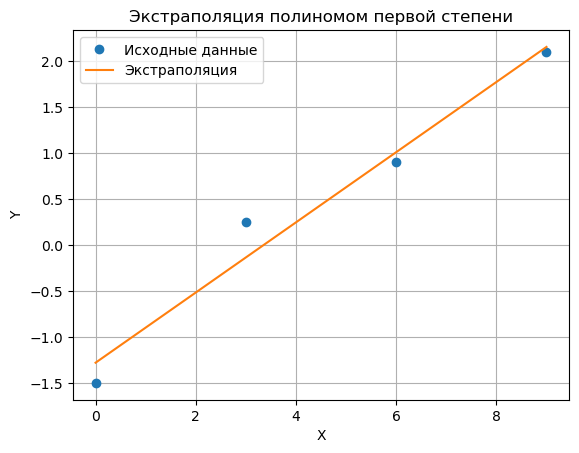

In [240]:
x = np.array([0, 3, 6, 9])
y = np.array([-1.5, 0.25, 0.90, 2.1])
A = np.vstack((x, np.ones(4))).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

plt.plot(x, y, 'o', label="Исходные данные")
plt.plot(x, m * x + c, label="Экстраполяция")
plt.title("Экстраполяция полиномом первой степени")
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()
plt.show()

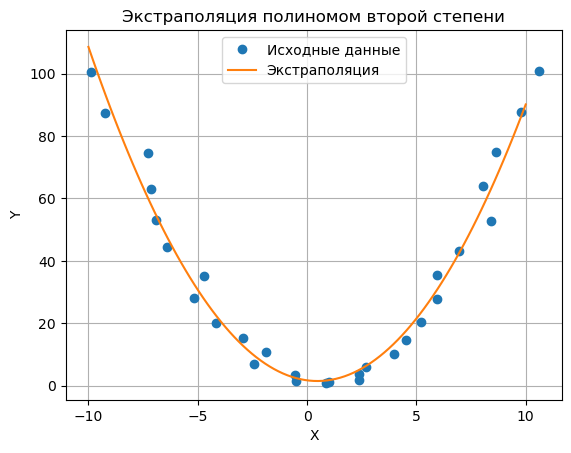

In [241]:
delta = 1.5
x = np.linspace(-10, 10, 30)
y = x ** 2 + delta * (np.random.rand(30))
x += delta * (np.random.rand(30))
m = np.vstack((x ** 2, x, np.ones(30))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = np.linspace(-10, 10, 100)
plt.plot(x, y, 'o', label="Исходные данные")
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], label="Экстраполяция")
plt.title("Экстраполяция полиномом второй степени")
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()
plt.show()

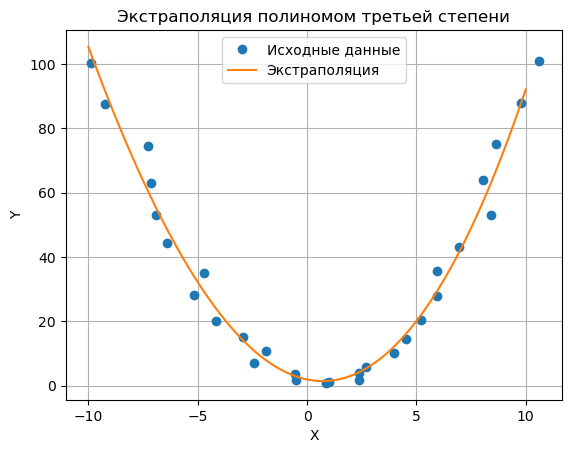

In [242]:
m = np.vstack((x ** 3, x ** 2, x, np.ones(30))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = np.linspace(-10, 10, 100)
plt.plot(x, y, 'o', label="Исходные данные")
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3],
         label="Экстраполяция")
plt.title("Экстраполяция полиномом третьей степени")
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()
plt.show()

Задание: Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

Линейное отклонение: [9.00760819e-04 4.34201253e-04 4.92628658e-04 2.17556209e-04
 1.67957941e-12]


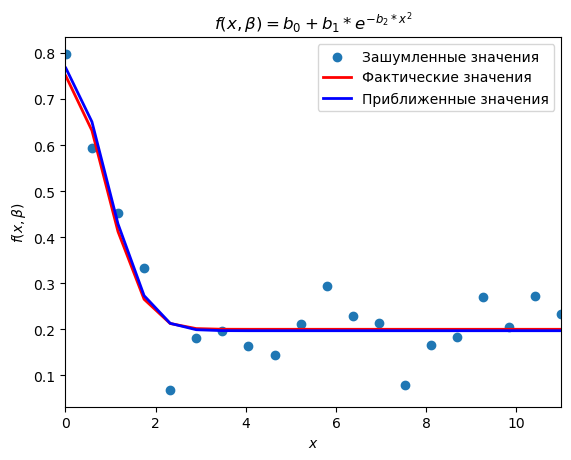

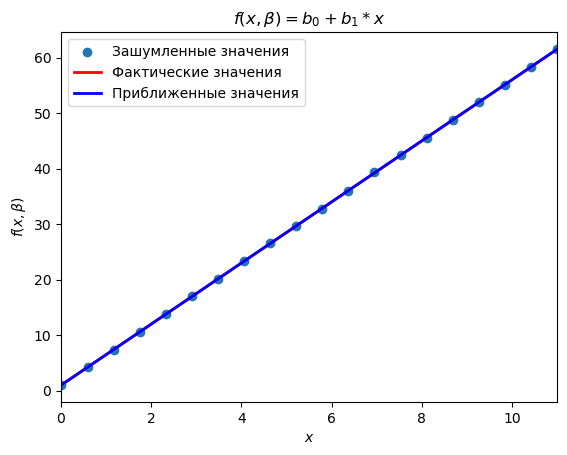

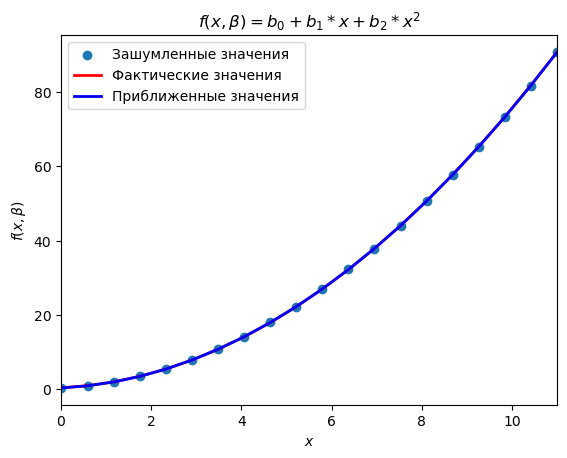

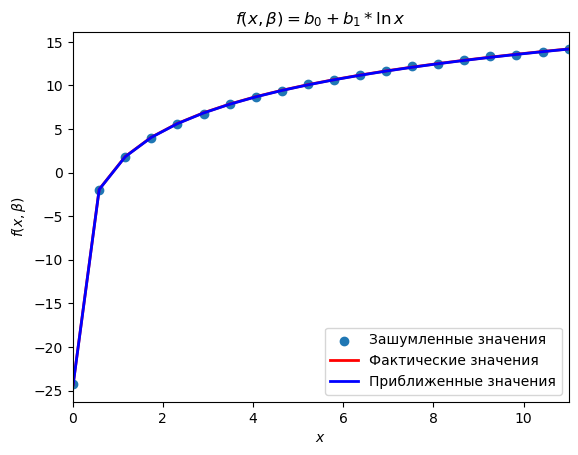

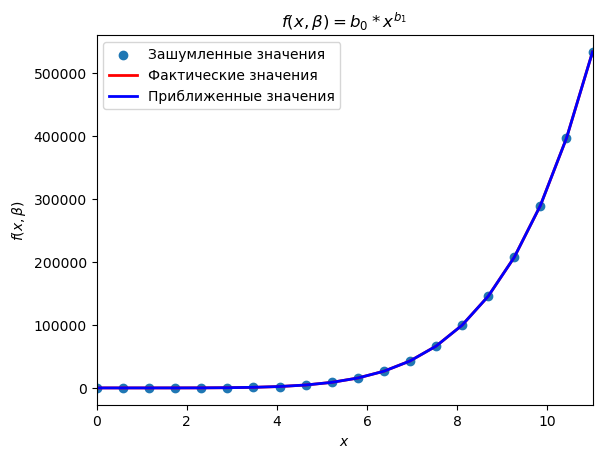

In [243]:
def f0(x, b0, b1, b2):
    """$f(x, \\beta) = b_0 + b_1 * e^{-b_2 * x ^2}$"""
    return b0 + b1 * np.exp(-b2 * x ** 2)


def f1(x, b0, b1):
    """$f(x, \\beta) = b_0 + b_1 * x$"""
    return b0 + b1 * x


def f2(x, b0, b1, b2):
    """$f(x, \\beta) = b_0 + b_1 * x + b_2 * x^2$"""
    return b0 + b1 * x + b2 * x ** 2


def f3(x, b0, b1):
    """$f(x, \\beta) = b_0 + b_1 * \ln{x}$"""
    return b0 + b1 * np.log(x)


def f4(x, b0, b1):
    """$f(x, \\beta) = b_0 * x^{b_1}$"""
    return b0 * x ** b1


beta1 = (1, 5.5)
beta2 = (0.2, 0.55, 0.7)
xdata = np.linspace(0.01, 11, 20)

y0 = f0(xdata, *beta2)
y1 = f1(xdata, *beta1)
y2 = f2(xdata, *beta2)
y3 = f3(xdata, *beta1)
y4 = f4(xdata, *beta1)

ydata0 = y0 + 0.05 * np.random.randn(len(xdata))
ydata1 = y1 + 0.05 * np.random.randn(len(xdata))
ydata2 = y2 + 0.05 * np.random.randn(len(xdata))
ydata3 = y3 + 0.05 * np.random.randn(len(xdata))
ydata4 = y4 + 0.05 * np.random.randn(len(xdata))

beta_opt0, beta_cov0 = sp.optimize.curve_fit(f0, xdata, ydata0)
beta_opt1, beta_cov1 = sp.optimize.curve_fit(f1, xdata, ydata1)
beta_opt2, beta_cov2 = sp.optimize.curve_fit(f2, xdata, ydata2)
beta_opt3, beta_cov3 = sp.optimize.curve_fit(f3, xdata, ydata3)
beta_opt4, beta_cov4 = sp.optimize.curve_fit(f4, xdata, ydata4)

lin_dev = np.array([sum(beta_cov0[0]),
                    sum(beta_cov1[0]),
                    sum(beta_cov2[0]),
                    sum(beta_cov3[0]),
                    sum(beta_cov4[0])])
print(f"Линейное отклонение: {lin_dev}")

fig, ax = plt.subplots()
ax.scatter(xdata, ydata0, label="Зашумленные значения")
ax.plot(xdata, y0, 'r', label="Фактические значения", lw=2)
ax.plot(xdata, f0(xdata, *beta_opt0), 'b', label="Приближенные значения", lw=2)
ax.set_xlim(0, 11)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x, \beta)$")
plt.title(f0.__doc__)
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.scatter(xdata, ydata1, label="Зашумленные значения")
ax.plot(xdata, y1, 'r', label="Фактические значения", lw=2)
ax.plot(xdata, f1(xdata, *beta_opt1), 'b', label="Приближенные значения", lw=2)
ax.set_xlim(0, 11)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x, \beta)$")
plt.title(f1.__doc__)
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.scatter(xdata, ydata2, label="Зашумленные значения")
ax.plot(xdata, y2, 'r', label="Фактические значения", lw=2)
ax.plot(xdata, f2(xdata, *beta_opt2), 'b', label="Приближенные значения", lw=2)
ax.set_xlim(0, 11)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x, \beta)$")
plt.title(f2.__doc__)
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.scatter(xdata, ydata3, label="Зашумленные значения")
ax.plot(xdata, y3, 'r', label="Фактические значения", lw=2)
ax.plot(xdata, f3(xdata, *beta_opt3), 'b', label="Приближенные значения", lw=2)
ax.set_xlim(0, 11)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x, \beta)$")
plt.title(f3.__doc__)
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.scatter(xdata, ydata4, label="Зашумленные значения")
ax.plot(xdata, y4, 'r', label="Фактические значения", lw=2)
ax.plot(xdata, f4(xdata, *beta_opt4), 'b', label="Приближенные значения", lw=2)
ax.set_xlim(0, 11)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x, \beta)$")
plt.title(f4.__doc__)
plt.legend()
plt.show()

Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы. Найдите коэффициенты линии регрессии. Постройте прогноз.

Свободный коэффициент регрессии: 26780.1
Вес предиктора Salary: 9312.58


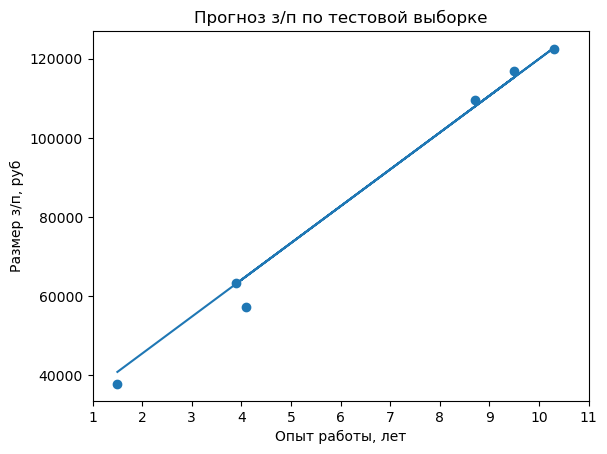

In [244]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv")

salary_reg_model = LinearRegression()

X = data.YearsExperience.values.reshape(data.shape[0], 1)
y = data.Salary.values.reshape(data.shape[0], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

salary_reg_model.fit(X_train, y_train)

print(f"Свободный коэффициент регрессии: {salary_reg_model.intercept_[0].round(2)}\n"
      f"Вес предиктора Salary: {salary_reg_model.coef_[0][0].round(2)}")

plt.scatter(X_test, y_test)
plt.plot(X_test, salary_reg_model.predict(X_test))
plt.title("Прогноз з/п по тестовой выборке")
plt.xlabel("Опыт работы, лет")
plt.ylabel("Размер з/п, руб")
plt.xticks(range(1, int(max(X_test)) + 2, 1))
plt.show()

Задание: Построить модель множественной линейной регрессии для оценки качества красного вина 
данных из нескольких столбцов. Найти коэффициенты множественной регрессии. Построить прогноз.
Замечание: ответы в двух последних ячейках.

In [245]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [246]:
data.shape

(1599, 12)

In [247]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [248]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: >

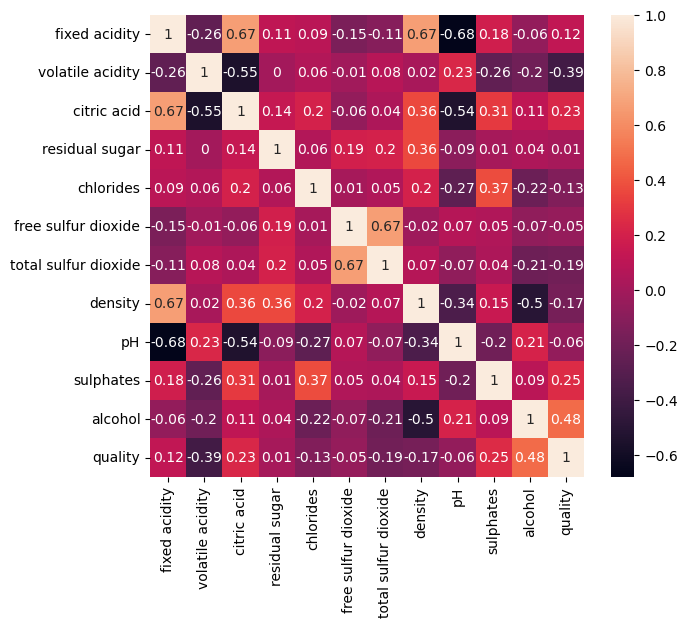

In [250]:
data_corr = data.corr().round(2)
plt.figure(figsize=(7, 6))
sns.heatmap(data_corr, annot=True)

In [251]:
X = data.drop('quality', axis=1)
y = data.quality
np.random.seed(99)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

quality_reg_model = LinearRegression()
quality_reg_model.fit(X_train, y_train)

print(f"Свободный коэффициент регрессии: {quality_reg_model.intercept_.round(2)}\n")
print(f"Веса предикторов:")
pd.DataFrame(quality_reg_model.coef_.round(2), index=X.columns, columns=['coef']).T

Свободный коэффициент регрессии: 5.66

Веса предикторов:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
coef,0.05,-0.19,-0.03,0.04,-0.09,0.05,-0.1,-0.06,-0.06,0.15,0.29


In [252]:
y_train_pred = quality_reg_model.predict(X_train)
y_test_pred = quality_reg_model.predict(X_test)
print(f"MSE train: {mean_squared_error(y_train, y_train_pred).round(4)}\n"
      f"MSE test: {mean_squared_error(y_test, y_test_pred).round(4)}")

MSE train: 0.4098
MSE test: 0.4479


Задание: Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов

     X    Y  Полином первой степени
0  3.0  2.0                    2.33
1  3.2  3.0                    2.53
2  3.4  3.0                    2.73
3  3.6  3.0                    2.93
4  3.8  2.0                    3.13
5  4.0  4.0                    3.33


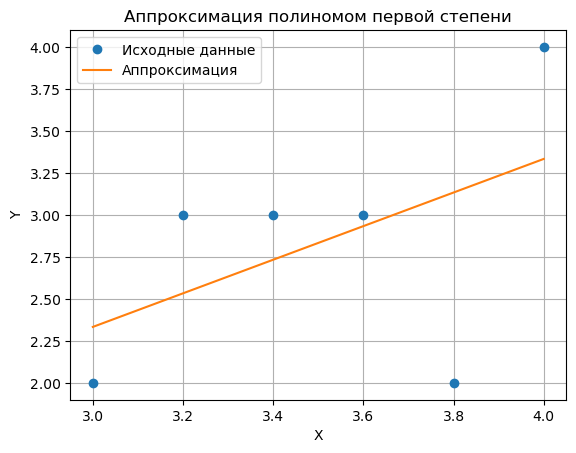

     X    Y  Полином второй степени
0  3.0  2.0                    2.39
1  3.2  3.0                    2.52
2  3.4  3.0                    2.69
3  3.6  3.0                    2.89
4  3.8  2.0                    3.12
5  4.0  4.0                    3.39


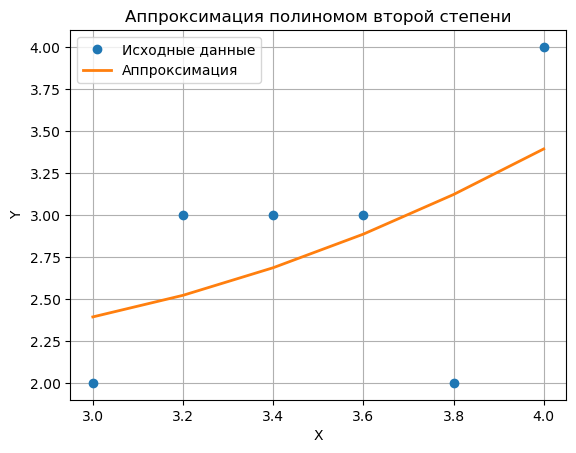

In [253]:
#Вариант 3 
x = np.array([3.0, 3.2, 3.4, 3.6, 3.8, 4.0])
y = np.array([2.0, 3.0, 3.0, 3.0, 2.0, 4.0])

# Полином первой степени
A = np.vstack((x, np.ones(len(x)))).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

df = pd.DataFrame({'X': x, 'Y': y, "Полином первой степени": m * x + c})
print(df.round(2))

plt.plot(x, y, 'o', label="Исходные данные")
plt.plot(x, m * x + c, label="Аппроксимация")
plt.title("Аппроксимация полиномом первой степени")
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()
plt.show()

# Полином второй степени
m = np.vstack((x ** 2, x, np.ones(len(x)))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

df = pd.DataFrame({'X': x, 'Y': y, "Полином второй степени": s[0] * x ** 2 + s[1] * x + s[2]})
print(df.round(2))

plt.plot(x, y, 'o', label="Исходные данные")
plt.plot(x, s[0] * x ** 2 + s[1] * x + s[2], lw=2, label="Аппроксимация")
plt.title("Аппроксимация полиномом второй степени")
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()
plt.show()